In [1]:
#Chargement des librairies
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import sys
import os

In [2]:
mlops_path = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Ajoutez le dossier features/domain au chemin
features_domain_path = os.path.join(mlops_path, 'features', 'domain')
sys.path.append(features_domain_path)

# Maintenant, vous pouvez importer des modules/fonctions depuis features/domain
from features import *


In [3]:
features_domain_path = os.path.join(mlops_path, 'features', 'infrastructure')
sys.path.append(features_domain_path)
from importation import *

In [4]:
df=importation()

In [5]:
donnees_manquantes(df)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

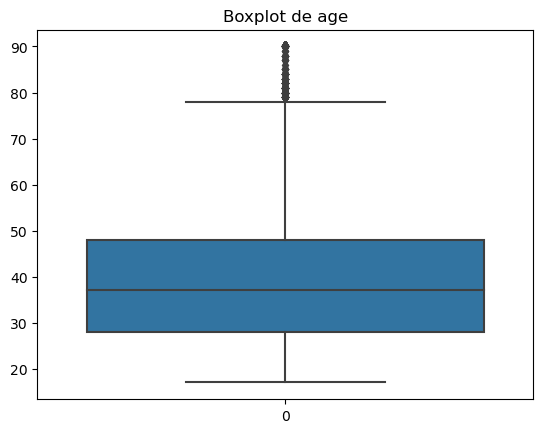

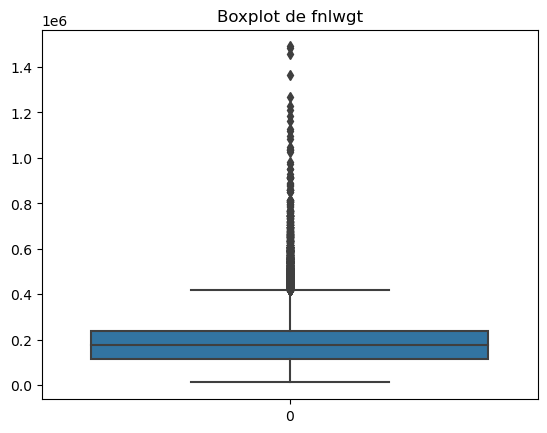

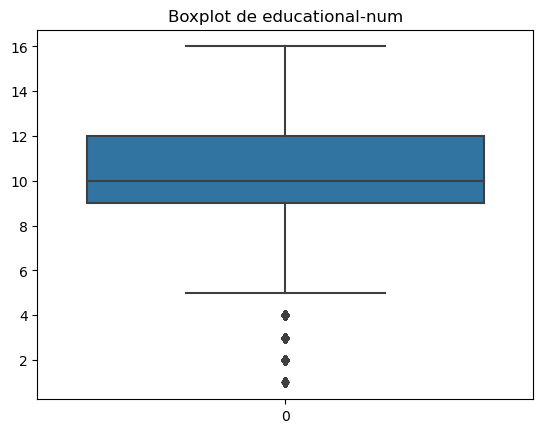

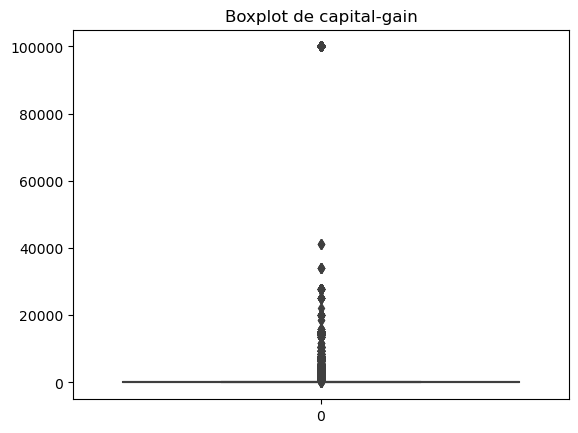

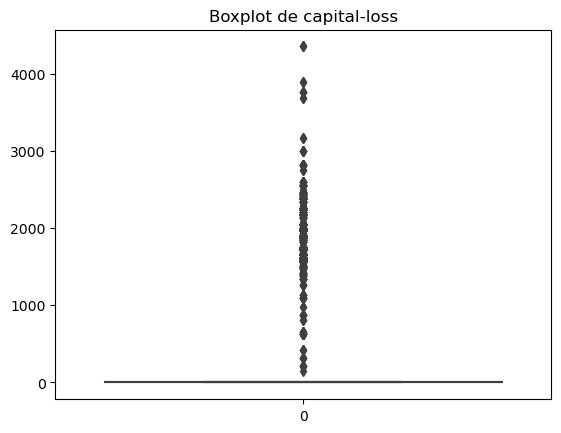

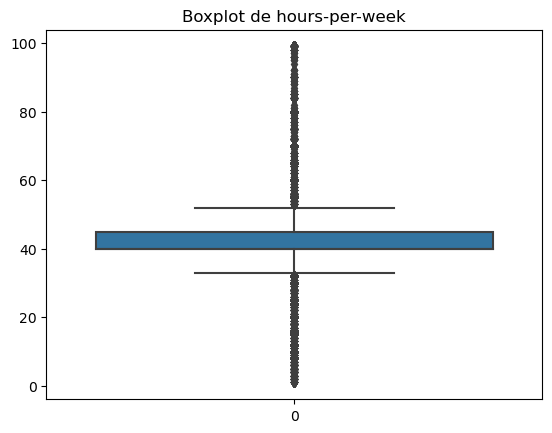

In [6]:
detecter_donnees_aberrantes_par_boxplot(df)

In [7]:
df=traiter_donnees_manquantes(df)

In [8]:
df=regroupement(df)

In [9]:
df=traitement_capital(df)

In [10]:
df=supprimer_colonnes(df)

In [11]:
#Visualisation de la base de données
df.head()

,gender,income,Age,Heures_semaine,Marital_status,Education,Occupation,Relationship,capital
0,Male,<=50K,<=28 ans,<=40H,Jamais_marie,Lycee,Artisan_Reparation,Autre,-0.191029
1,Male,<=50K,29_39 ans,>46H,Marie,Lycee,Artisan_Reparation,Conjoint,-0.191029
2,Male,>50K,<=28 ans,<=40H,Marie,Sup,Armee_defense,Conjoint,-0.191029
3,Male,>50K,40_49 ans,<=40H,Marie,Sup,Artisan_Reparation,Conjoint,2.779084
4,Female,<=50K,<=28 ans,<=40H,Jamais_marie,Sup,Autre,Autre,-0.191029


C:\Users\104009\AppData\Local\Temp\ipykernel_17764\4163391460.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  couleurs=plt.cm.get_cmap('tab10',len(modalites_obs))


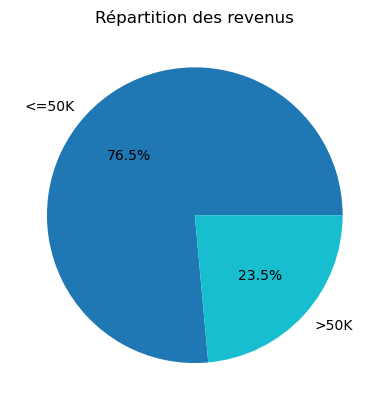

In [13]:

#Revenu annuel des inidividus enqêtés
modalites_obs= df['income'].value_counts()
couleurs=plt.cm.get_cmap('tab10',len(modalites_obs))
plt.pie(modalites_obs, labels=modalites_obs.index, autopct='%1.1f%%', colors=couleurs.colors)
plt.title('Répartition des revenus')
plt.show()
#Cette visualisation permet de voir la répartition des revenus annuels des individus enquêtés, en effet nous remarquons que juste une minorité arrivent à percevoir un salaire annuel supérieur à 50 000$ 

C:\Users\104009\AppData\Local\Temp\ipykernel_17764\351147534.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  couleurs=plt.cm.get_cmap('tab10',len(modalites_obs))


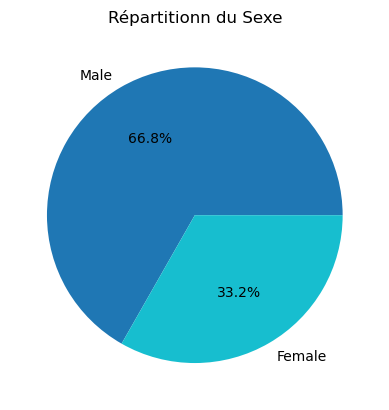

In [14]:
#Le sexe des personnes enquêtées
modalites_obs= df['gender'].value_counts()
couleurs=plt.cm.get_cmap('tab10',len(modalites_obs))
plt.pie(modalites_obs, labels=modalites_obs.index, autopct='%1.1f%%', colors=couleurs.colors)
plt.title('Répartitionn du Sexe')
plt.show()
#Cette visualisation permet de voir la répartition du sexe des individus enquêtés, en effet on fait face à une population mixte avec une majorité d'hommes

C:\Users\104009\AppData\Local\Temp\ipykernel_17764\148211641.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  couleurs=plt.cm.get_cmap('tab10',len(modalites_obs))


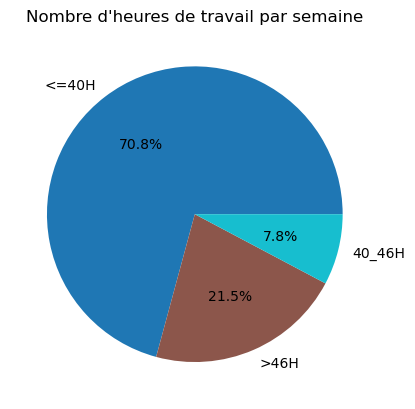

In [15]:
#Le nombre d'heures de travail par semaine des personnes enquêtées
modalites_obs= df['Heures_semaine'].value_counts()
couleurs=plt.cm.get_cmap('tab10',len(modalites_obs))
plt.pie(modalites_obs, labels=modalites_obs.index, autopct='%1.1f%%', colors=couleurs.colors)
plt.title('Nombre d\'heures de travail par semaine')
plt.show()
#Cette visualisation peremt d'avoir du nombre d'heures/semaine éffectués généralement par les personnes enquêtées, effet une grosse partie travaillent généralment 40H ou moins 

C:\Users\104009\AppData\Local\Temp\ipykernel_17764\3595330664.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  couleurs=plt.cm.get_cmap('tab10',len(modalites_obs))


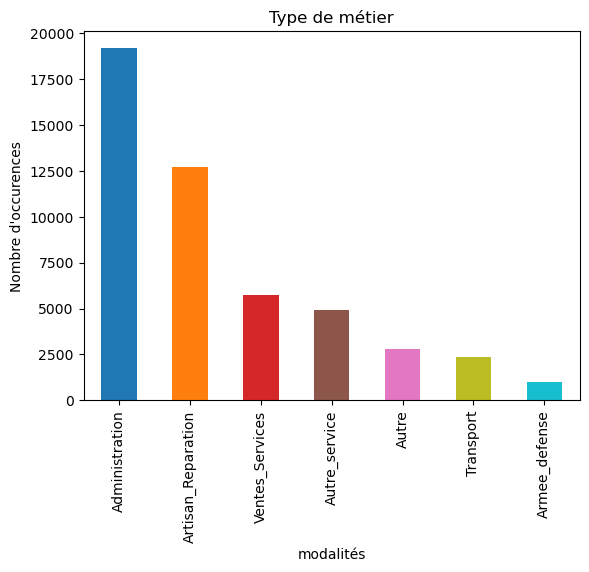

In [16]:
#Le type de métier des individus enquêtés
modalites_obs= df['Occupation'].value_counts()
couleurs=plt.cm.get_cmap('tab10',len(modalites_obs))
modalites_obs.plot(kind='bar', color=couleurs.colors)
plt.title('Type de métier')
plt.xlabel('modalités')
plt.ylabel('Nombre d\'occurences')
plt.show() 
#Cette visualisation nous montre le type de métier exercé par les personnes enquêtées, en effet nous retrouvons 5 métiers qui ressortent de l'enquête avec une forte concentration au niveau des métiers de l'administration et de l'artisanat mécanique

C:\Users\104009\AppData\Local\Temp\ipykernel_17764\3455728534.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  couleurs=plt.cm.get_cmap('tab10',len(modalites_obs))


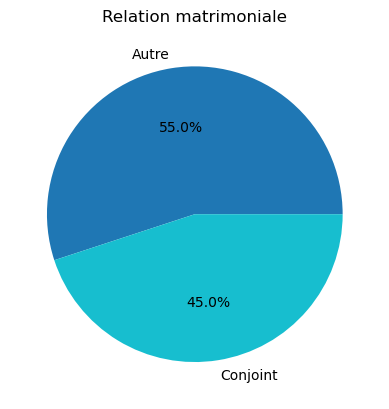

In [17]:
#La relation matrimoniale des personnes enquêtées
modalites_obs= df['Relationship'].value_counts()
couleurs=plt.cm.get_cmap('tab10',len(modalites_obs))
plt.pie(modalites_obs, labels=modalites_obs.index, autopct='%1.1f%%', colors=couleurs.colors)
plt.title('Relation matrimoniale')
plt.show()
#Cette visualisation nous montre la situation relationnelle des personnes enquêtées, en effet nous remarquons qu'une quasi moitié sont conjoints et une autre catégorie un peu plus que la moitié sont autres

C:\Users\104009\AppData\Local\Temp\ipykernel_17764\2137861329.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  couleurs=plt.cm.get_cmap('tab10',len(modalites_obs))


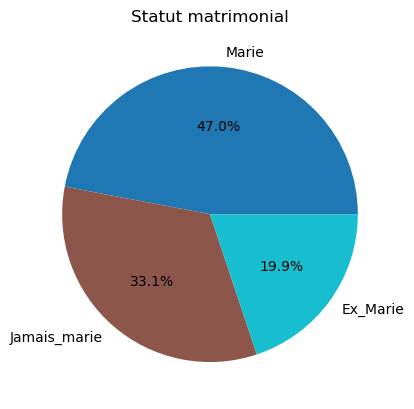

In [19]:
#Le statut matrimonial des personnes enquêtées
modalites_obs= df['Marital_status'].value_counts()
couleurs=plt.cm.get_cmap('tab10',len(modalites_obs))
plt.pie(modalites_obs, labels=modalites_obs.index, autopct='%1.1f%%', colors=couleurs.colors)
plt.title('Statut matrimonial')
plt.show()
#Cette visualisation nous montre le statut matrimonial des personnes enquêtées, en effet nous retouvons 3 modalités (Marie,Divorce,Seul) avec une majorité qui sont mariées

<Figure size 1000x600 with 0 Axes>

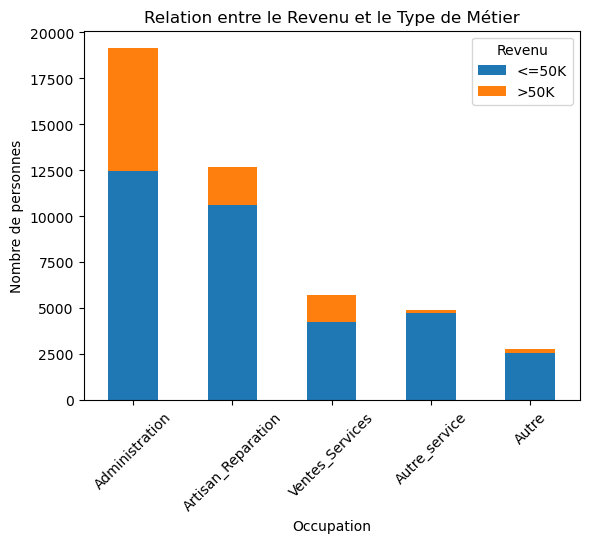

In [20]:
# Calcul de la table de contingence entre le revenu et l'occupation
cross_tab_percent = pd.crosstab(df['Occupation'], df['income'])

# Sélection des occupations les plus courantes (par exemple, les 5 occupations les plus fréquentes)
top_occupations = cross_tab_percent.sum(axis=1).nlargest(5).index

# Filtrage pour ne garder que les données des occupations sélectionnées
cross_tab_percent_filtered = cross_tab_percent.loc[top_occupations]

# Création du graphique à barres pour visualiser la relation entre le revenu et l'occupation
plt.figure(figsize=(10, 6))  # Ajuster la taille du graphique au besoin
cross_tab_percent_filtered.plot(kind='bar', stacked=True)
plt.title('Relation entre le Revenu et le Type de Métier')
plt.xlabel('Occupation')
plt.ylabel('Nombre de personnes')
plt.legend(title='Revenu')
plt.xticks(rotation=45)  # Ajuster l'orientation des étiquettes sur l'axe des x
plt.show()
# Nous contastons que les personnes qui travaillent dans les métiers administratifs sont ceux qui perçoivent des revenus annuels supérieur à 50 000$

<Figure size 1000x600 with 0 Axes>

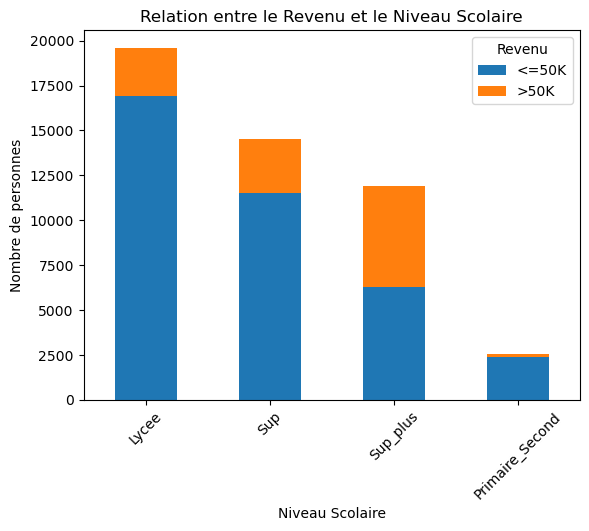

In [25]:
# Calcul de la table de contingence entre le revenu et l'éducation
cross_tab_percent_education = pd.crosstab(df['Education'], df['income'])

# Sélection des niveaux d'éducation les plus courants (par exemple, les 5 niveaux les plus fréquents)
top_educations = cross_tab_percent_education.sum(axis=1).nlargest(5).index

# Filtrage pour ne garder que les données des niveaux d'éducation sélectionnés
cross_tab_percent_education_filtered = cross_tab_percent_education.loc[top_educations]

# Création du graphique à barres pour visualiser la relation entre le revenu et l'éducation
plt.figure(figsize=(10, 6))  # Ajuster la taille du graphique au besoin
cross_tab_percent_education_filtered.plot(kind='bar', stacked=True)
plt.title('Relation entre le Revenu et le Niveau Scolaire')
plt.xlabel('Niveau Scolaire')
plt.ylabel('Nombre de personnes')
plt.legend(title='Revenu')
plt.xticks(rotation=45)  # Ajuster l'orientation des étiquettes sur l'axe des x
plt.show()

#Nous contastons que ce sont les personnes avec un niveau scolaire supérieur sont ceux qui perçoivent plus des revenus annuels supérieur à 50 000$

<Figure size 1000x600 with 0 Axes>

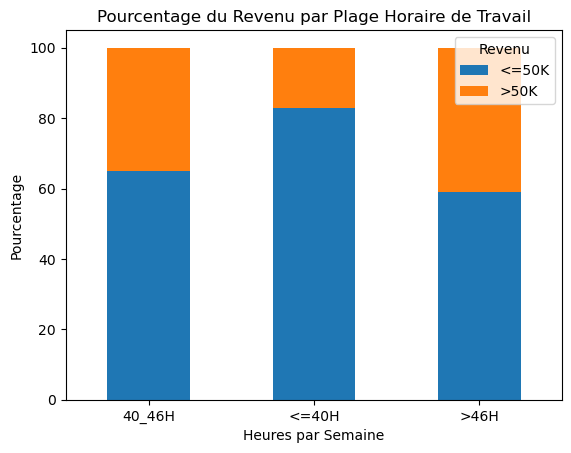

In [26]:
# Calcul de la table de contingence entre le revenu et le nombre d'heures par semaine
cross_tab_hours_income = pd.crosstab(df['Heures_semaine'], df['income'])

# Calcul des pourcentages en divisant par la somme de chaque ligne et en multipliant par 100
cross_tab_percentages = cross_tab_hours_income.div(cross_tab_hours_income.sum(axis=1), axis=0) * 100

# Sélection des heures de travail les plus courantes (par exemple, les 5 plages horaires les plus fréquentes)
top_hours = cross_tab_percentages.sum(axis=1).nlargest(5).index

# Filtrage pour ne garder que les données des plages horaires sélectionnées
cross_tab_filtered_percentages = cross_tab_percentages.loc[top_hours]

# Création du graphique à barres pour visualiser la relation entre le revenu et le nombre d'heures par semaine (en pourcentage)
plt.figure(figsize=(10, 6))  # Ajuster la taille du graphique au besoin
cross_tab_filtered_percentages.plot(kind='bar', stacked=True)
plt.title('Pourcentage du Revenu par Plage Horaire de Travail')
plt.xlabel('Heures par Semaine')
plt.ylabel('Pourcentage')
plt.legend(title='Revenu')
plt.xticks(rotation=0)  # Ajuster l'orientation des étiquettes sur l'axe des x si nécessaire
plt.show()
# Nous pouvons voir que les individus qui travaillent plus de 46h par semaine sont ceux qui perçoivent plus de 50 000$ par an


<Figure size 800x600 with 0 Axes>

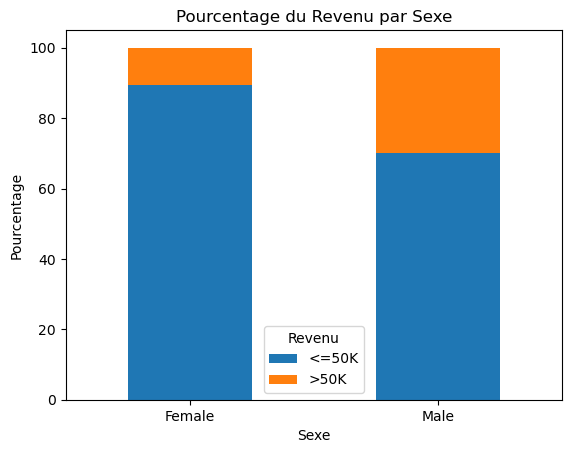

In [28]:
# Calcul de la table de contingence entre le revenu et le sexe
cross_tab_sex_income = pd.crosstab(df['gender'], df['income'])

# Calcul des pourcentages en divisant par la somme de chaque ligne et en multipliant par 100
cross_tab_percentages_sex = cross_tab_sex_income.div(cross_tab_sex_income.sum(axis=1), axis=0) * 100

# Création du graphique à barres pour visualiser la relation entre le revenu et le sexe (en pourcentage)
plt.figure(figsize=(8, 6))  # Ajuster la taille du graphique au besoin
cross_tab_percentages_sex.plot(kind='bar', stacked=True)
plt.title('Pourcentage du Revenu par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Pourcentage')
plt.legend(title='Revenu')
plt.xticks(rotation=0)  # Ajuster l'orientation des étiquettes sur l'axe des x si nécessaire
plt.show()
# Nous pouvons voir que les hommes sont ceux qui perçoivent plus de 50 000$ par an


<Figure size 1200x800 with 0 Axes>

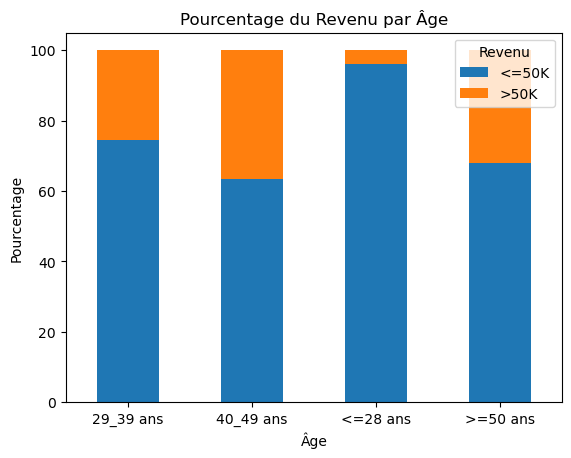

In [29]:
import matplotlib.pyplot as plt

# Calcul de la table de contingence entre le revenu et l'âge
cross_tab_age_income = pd.crosstab(df['Age'], df['income'])

# Calcul des pourcentages en divisant par la somme de chaque ligne et en multipliant par 100
cross_tab_percentages_age = cross_tab_age_income.div(cross_tab_age_income.sum(axis=1), axis=0) * 100

# Création du graphique à barres pour visualiser la relation entre le revenu et l'âge (en pourcentage)
plt.figure(figsize=(12, 8))  # Ajuster la taille du graphique au besoin
cross_tab_percentages_age.plot(kind='bar', stacked=True)
plt.title('Pourcentage du Revenu par Âge')
plt.xlabel('Âge')
plt.ylabel('Pourcentage')
plt.legend(title='Revenu')
plt.xticks(rotation=0)  # Ajuster l'orientation des étiquettes sur l'axe des x si nécessaire
plt.show()

# Nous pouvons voir que les individus âgés de 40-49 ans sont ceux qui perçoivent plus de 50 000$ par an

<Figure size 1200x800 with 0 Axes>

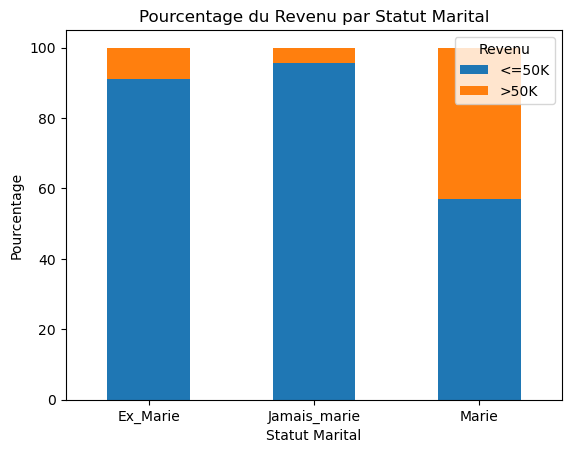

In [30]:
# Calcul de la table de contingence entre le revenu et le statut marital
cross_tab_marital_income = pd.crosstab(df['Marital_status'], df['income'])

# Calcul des pourcentages en divisant par la somme de chaque ligne et en multipliant par 100
cross_tab_percentages_marital = cross_tab_marital_income.div(cross_tab_marital_income.sum(axis=1), axis=0) * 100

# Création du graphique à barres pour visualiser la relation entre le revenu et le statut marital (en pourcentage)
plt.figure(figsize=(12, 8))  # Ajuster la taille du graphique au besoin
cross_tab_percentages_marital.plot(kind='bar', stacked=True)
plt.title('Pourcentage du Revenu par Statut Marital')
plt.xlabel('Statut Marital')
plt.ylabel('Pourcentage')
plt.legend(title='Revenu')
plt.xticks(rotation=0)  # Ajuster l'orientation des étiquettes sur l'axe des x si nécessaire
plt.show()
# Nous pouvons voir que les indvidus mariés sont ceux qui perçoivent le plus des revenus supérieurs à 50 000$